### Anaconda & Python Version:

The version of the notebook server is 5.0.0 and is running on:
Python 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]

Current Kernel Information:
Python 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
Type 'copyright', 'credits' or 'license' for more information
IPython 6.1.0 -- An enhanced Interactive Python. Type '?' for help.

#### Anaconda 5.0.1 (not sure)

### Steps:
#### 1.
#### 2.
#### 3.
#### 4.
#### 5.
#### 6.
#### 7.
#### 8.
### Strategy for Forecasting:
##### 1. Trainer is only using Training data for accuracy maximization, then predicts once on Test (so no check on Overfitting)
##### 2. To maximize accuracy and prevent overfitting we can use following strategy:
##### 3. Create a Validation data (Oct-Dec 2016) : 
##### Note -- Current Train (Jan 2012-Sep 2016) -- Test (Jan 2017)
#####          -- Updated Train (Jan 2012-Sep 2016) -- Validation data (Oct-Dec 2016) -- Test (Jan 2017)
##### 4. Accuracy Maximization - Plot Train vs Validation accuracies, choose where Train_acc=higher side and Validation accuracy=highest
##### 5. Use Same Model (Training (Jan 2012-Sep 2016)) for Jan 2017 accuracy check
##### 5. Use Updated Model (Training (Jan 2012-Dec 2016)) for Jan 2017 accuracy check (same parameters)
##### Check if Trainers accuracy is beaten

In [1]:
###########################################################
###########################################################
# 1. Basic/Default RNN(LSTM) Code
###########################################################
###########################################################



# tbd

In [2]:
###########################################################
# 1.1 Data Pre-Processing
###########################################################

In [3]:
## Code for single feature modelling ('Open' stock price)

# Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Training set
dataset_train = pd.read_csv('C:/Users/anurag.trivedi/2. Data/3. RNN Data/Recurrent_Neural_Networks/Updated/Google_Stock_Price_Train.csv')
df1 = dataset_train.head(5)
print('dataset_train raw:')
print(df1)

# creating np array
training_set = dataset_train.iloc[:,1:2].values # 2 D np array created
# range 1:2 and .values help create a np array from 2nd column of df; only np arrays are taken as inputs in NN
# 'dataset_train.iloc[:,1]' will create a vector and not np array
# 'dataset_train.iloc[:,1:2]' will create a df and not np array
# 'dataset_train.iloc[:,1:2].values' will create a np array
print('training_set before shaping:')
print(training_set)

# Feature Scaling:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1)) # Min-Max Normalization preferred for RNN
training_set_scaled = sc.fit_transform(training_set)
print('training_set_scaled before shaping:')
print(training_set_scaled)

# Creating a data structure with 60 timesteps and 1 output:
TS_Range = 120 # timesteps (should be optimized) extent of past data used for next prediction
X_train = [] # empty list defined
Y_train = [] # empty list defined
for i in range(TS_Range, len(training_set)):
    X_train.append(training_set_scaled[i-TS_Range:i, 0]) # [a,b], this format since array is 2D
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
# Note: can add other vars apart from last 60 open prices; ex closing stock price. But wont do in this impl(keeping only 1 feature, opening price)
print('X_train: 2D np array')
print(X_train)
print('Y_train: 2D np array')
print(Y_train)

# 3D Reshaping:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# can add extra features with current 3D shape, but not doing it in this implementation(3rd dim=1 means only 1 feature added, opening price)
# .shape[0]=no of rows(total initial number of stock prices-timesteps); .shape[1]=no of columns(timesteps); 1=no of features(here its 'open stock price')
print('X_train: 3D np array')
print(X_train)
print('Y_train: 3D np array')
print(Y_train)

dataset_train raw:
         Date    Open    High     Low   Close       Volume
0  01-03-2012  325.25  332.83  324.97  663.59    73,80,500
1  01-04-2012  331.27  333.87  329.08  666.45    57,49,400
2  01-05-2012  329.83  330.75  326.89  657.21    65,90,300
3  01-06-2012  328.34  328.77  323.68  648.24    54,05,900
4  01-09-2012  322.04  322.29  309.46  620.76  1,16,88,800
training_set before shaping:
[[325.25]
 [331.27]
 [329.83]
 ...
 [777.85]
 [781.44]
 [776.33]]
training_set_scaled before shaping:
[[0.09090193]
 [0.1027647 ]
 [0.09992709]
 ...
 [0.98277731]
 [0.98985162]
 [0.97978206]]
X_train: 2D np array
[[0.09090193 0.1027647  0.09992709 ... 0.01911443 0.01915384 0.00752754]
 [0.1027647  0.09992709 0.09699096 ... 0.01915384 0.00752754 0.00687725]
 [0.09992709 0.09699096 0.08457643 ... 0.00752754 0.00687725 0.00238438]
 ...
 [0.91601474 0.91414271 0.9042505  ... 1.         0.99241334 0.97814649]
 [0.91414271 0.9042505  0.92624195 ... 0.99241334 0.97814649 0.98277731]
 [0.9042505  0.

In [392]:
## Code for multiple feature modelling (here 2, 'Open' stock price and 'High' during the day)
## 'Uncomment all code below'

# dataset_train = pd.read_csv('C:/Users/anurag.trivedi/2. Data/RNN Data/Recurrent_Neural_Networks/Updated/Google_Stock_Price_Train.csv')
# df1 = dataset_train.head(5)
# print('dataset_train raw:')
# print(df1)

# # creating np array
# training_set = dataset_train.iloc[:,1:3].values # 2 D np array created
# # range 1:2 and .values help create a np array from 2nd column of df; only np arrays are taken as inputs in NN
# # 'dataset_train.iloc[:,1]' will create a vector and not np array
# # 'dataset_train.iloc[:,1:2]' will create a df and not np array
# # 'dataset_train.iloc[:,1:2].values' will create a np array
# print('training_set before shaping:')
# print(training_set)

# # Feature Scaling:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range = (0,1)) # Min-Max Normalization preferred for RNN
# training_set_scaled = sc.fit_transform(training_set)
# print('training_set_scaled before shaping:')
# print(training_set_scaled)

# # Creating a data structure with 60 timesteps and 1 output:
# TS_Range = 60 # timesteps (should be optimized) extent of past data used for next prediction
# X_train = [] # empty list defined
# X_train_1 = [] # empty list defined
# Y_train = [] # empty list defined
# Y_train_1 = [] # empty list defined
# for i in range(TS_Range, len(training_set)):
#     X_train.append(training_set_scaled[i-TS_Range:i, 0]) # [a,b], this format since array is 2D
#     X_train_1.append(training_set_scaled[i-TS_Range:i, 1])
#     Y_train.append(training_set_scaled[i, 0])

# X_train, X_train_1, Y_train = np.array(X_train), np.array(X_train_1), np.array(Y_train)

# # creates 2*TS_Range columns; half for one attribute, half for another
# X_train = np.concatenate((X_train, X_train_1), axis=1) # cbind

# # Note: can add other vars apart from last 60 open prices; ex closing stock price. But wont do in this impl(keeping only 1 feature, opening price)
# print('X_train: 2D np array')
# print(X_train)
# print('Y_train: 2D np array')
# print(Y_train)

# # 3D Reshaping:
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# # can add extra features with current 3D shape, but not doing it in this implementation(3rd dim=1 means only 1 feature added, opening price)
# # .shape[0]=no of rows(total initial number of stock prices-timesteps); .shape[1]=no of columns(timesteps); 1=no of features(here its 'open stock price')
# print('X_train: 3D np array')
# print(X_train)
# print('Y_train: 3D np array')
# print(Y_train)

dataset_train raw:
         Date    Open    High     Low   Close       Volume
0  01-03-2012  325.25  332.83  324.97  663.59    73,80,500
1  01-04-2012  331.27  333.87  329.08  666.45    57,49,400
2  01-05-2012  329.83  330.75  326.89  657.21    65,90,300
3  01-06-2012  328.34  328.77  323.68  648.24    54,05,900
4  01-09-2012  322.04  322.29  309.46  620.76  1,16,88,800
training_set before shaping:
[[ 325.25  332.83]
 [ 331.27  333.87]
 [ 329.83  330.75]
 ..., 
 [ 777.85  781.81]
 [ 781.44  785.8 ]
 [ 776.33  780.94]]
training_set_scaled before shaping:
[[ 0.09090193  0.10148233]
 [ 0.1027647   0.10352691]
 [ 0.09992709  0.09739315]
 ..., 
 [ 0.98277731  0.98415445]
 [ 0.98985162  0.99199858]
 [ 0.97978206  0.98244407]]
X_train: 2D np array
[[ 0.09090193  0.1027647   0.09992709 ...,  0.08319899  0.08713089
   0.09212441]
 [ 0.1027647   0.09992709  0.09699096 ...,  0.08713089  0.09212441
   0.09015846]
 [ 0.09992709  0.09699096  0.08457643 ...,  0.09212441  0.09015846
   0.08711123]
 ..

In [52]:
###########################################################
# 1.2 Building the RNN - Default Model
###########################################################

In [4]:
# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [5]:
# Same code for single/multi feature modelling
# Changes for multi feature: no changes

# Initializing the RNN
Regressor = Sequential()

# Adding LSTM layers and Dropout Regularization
Regressor.add( LSTM( units=100, return_sequences=True, input_shape=(X_train.shape[1], 1) ) ) 
# last parameter is for 1/more features
# input_shape has last 2 parameters of np.reshape function in 'data pre-processing' paragraph
# LSTMs by default use tanh activation
Regressor.add( Dropout(0.1) )

Regressor.add( LSTM( units=100, return_sequences=True ) )
Regressor.add( Dropout(0.1) )

Regressor.add( LSTM( units=100, return_sequences=True ) )
Regressor.add( Dropout(0.1) )

Regressor.add( LSTM( units=100 ) )
Regressor.add( Dropout(0.1) )

# Output layer
Regressor.add( Dense( units=1 ) )

# 'return_sequence=True' means will add another LSTM layer after this
# input_shape has last 2 parameters of np.reshape function
# author says 0.2 dropout is standard here

# Compiling the RNN
Regressor.compile( optimizer='adam', loss='mean_squared_error' )
# RMSprop is preferred; but author using adam since he found it more useful

# Fitting RNN
Regressor.fit( X_train, Y_train, epochs=100, batch_size=32 )
# Author said too much reduction in error on Training can cause overfitting and hence lesser accuracy on Test
# But trying to reduce accuracy on Vald can also cause overfitting on Vald and acc reduction for Test
# Maybe good to find an automated method like Auto-Arima
# loss at 0.0012 for 100 epochs

# Approach - Build 2-3 approaches and finalize one which minimizes error on Test

Epoch 1/100
1075/1075 [==============================] - 19s 17ms/step - loss: 0.0481
Epoch 2/100
 576/1075 [===============>..............] - ETA: 6s - loss: 0.0054

KeyboardInterrupt: 

In [79]:
###########################################################
# 1.3 Making the Next Day Predictions(Sequence Predictions) and Visualizing the Results - Vald
# Note: Predictions are only for next day, then actual of next day is taken to predict for day after
# Separate code written below(in section 3.) to forecast for multiple days at once
###########################################################

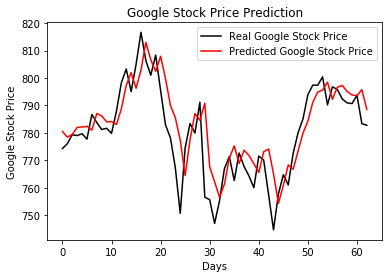

94.396201682914565

In [402]:
## Code for single feature modelling ('Open' stock price)

# Importing the Validation set
dataset_vald = pd.read_csv('C:/Users/anurag.trivedi/2. Data/RNN Data/Recurrent_Neural_Networks/Updated/Google_Stock_Price_Vald.csv')
vald_set = dataset_vald.iloc[:,1:2].values

# Combining with last 60 values before vald timeframe:
train_vald_set = np.concatenate([training_set,vald_set]) # 2 np arrays concatenated
vald_set_1 = train_vald_set[ (len(training_set) - TS_Range) : len(train_vald_set) , :  ] # Timesteps_Range = 60

# QC:
# np.savetxt("C:/Users/anurag.trivedi/2. Data/RNN Data/Recurrent_Neural_Networks/Updated/Temp.csv", vald_set, delimiter=",") 

# Feature Scaling:
vald_set_scaled = sc.transform(vald_set_1)
# print(vald_set_scaled)

# Creating a data structure with 60 timesteps and no output:
# TS_Range = 60 # timesteps (should be optimized) extent of past data used for next prediction
X_Vald = []
for i in range(TS_Range, len(vald_set_scaled)):
    X_Vald.append( vald_set_scaled[i-TS_Range:i, 0] )
X_Vald = np.array(X_Vald)

# QC:
# np.savetxt("C:/Users/anurag.trivedi/2. Data/RNN Data/Recurrent_Neural_Networks/Updated/Temp1.csv", vald_set_scaled, delimiter=",")
# np.savetxt("C:/Users/anurag.trivedi/2. Data/RNN Data/Recurrent_Neural_Networks/Updated/Temp2.csv", X_Vald, delimiter=",") 

# 3D Reshaping:
X_Vald = np.reshape(X_Vald, (X_Vald.shape[0], X_Vald.shape[1], 1))

# Predictions:
X_Vald_Predicted = Regressor.predict(X_Vald)
X_Vald_Predicted = sc.inverse_transform(X_Vald_Predicted)

# Visualizing the results:
plt.plot(vald_set, color = 'black', label = 'Real Google Stock Price')
plt.plot(X_Vald_Predicted, color = 'red', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# MSE
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(vald_set, X_Vald_Predicted)
mse

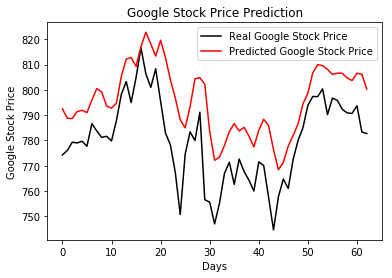

312.84804006023137

In [394]:
## Code for multiple feature modelling (here 2, 'Open' stock price and 'High' during the day)
## 'Uncomment all code below'

# # Importing the Validation set
# dataset_vald = pd.read_csv('C:/Users/anurag.trivedi/2. Data/RNN Data/Recurrent_Neural_Networks/Updated/Google_Stock_Price_Vald.csv')
# vald_set = dataset_vald.iloc[:,1:3].values

# # Combining with last 60 values before vald timeframe:
# train_vald_set = np.concatenate([training_set,vald_set]) # 2 np arrays concatenated
# vald_set_1 = train_vald_set[ (len(training_set) - TS_Range) : len(train_vald_set) , :  ] # Timesteps_Range = 60

# # QC:
# # np.savetxt("C:/Users/anurag.trivedi/2. Data/RNN Data/Recurrent_Neural_Networks/Updated/Temp.csv", vald_set, delimiter=",") 

# # Feature Scaling:
# vald_set_scaled = sc.transform(vald_set_1)
# # print(vald_set_scaled)

# # Creating a data structure with 60 timesteps and no output:
# # TS_Range = 60 # timesteps (should be optimized) extent of past data used for next prediction
# X_Vald = []
# X_Vald_1 = []
# for i in range(TS_Range, len(vald_set_scaled)):
#     X_Vald.append( vald_set_scaled[i-TS_Range:i, 0] )
#     X_Vald_1.append( vald_set_scaled[i-TS_Range:i, 1] )
# X_Vald, X_Vald_1 = np.array(X_Vald), np.array(X_Vald_1)

# # creates 2*TS_Range columns; half for one attribute, half for another
# X_Vald = np.concatenate((X_Vald, X_Vald_1), axis=1) # cbind

# # QC:
# # np.savetxt("C:/Users/anurag.trivedi/2. Data/RNN Data/Recurrent_Neural_Networks/Updated/Temp1.csv", vald_set_scaled, delimiter=",")
# # np.savetxt("C:/Users/anurag.trivedi/2. Data/RNN Data/Recurrent_Neural_Networks/Updated/Temp2.csv", X_Vald, delimiter=",") 

# # 3D Reshaping:
# X_Vald = np.reshape(X_Vald, (X_Vald.shape[0], X_Vald.shape[1], 1))

# # Predictions:
# X_Vald_Predicted = Regressor.predict(X_Vald)
# # sc.inverse_transform will inverse 2 columns, hence below workaround
# X_Vald_Predicted = np.concatenate((X_Vald_Predicted, X_Vald_Predicted), axis=1) # cbind
# X_Vald_Predicted = sc.inverse_transform( X_Vald_Predicted )
# X_Vald_Predicted = X_Vald_Predicted[:,0]
# X_Vald_Predicted

# # Visualizing the results:
# plt.plot(vald_set[:,0], color = 'black', label = 'Real Google Stock Price')
# plt.plot(X_Vald_Predicted, color = 'red', label = 'Predicted Google Stock Price')
# plt.title('Google Stock Price Prediction')
# plt.xlabel('Days')
# plt.ylabel('Google Stock Price')
# plt.legend()
# plt.show()

# # MSE
# import math
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(vald_set[:,0], X_Vald_Predicted)
# mse

In [ ]:
###########################################################
# 1.3.2 Manual Parameter Tuning (Min Training and Validation MSE)
###########################################################

In [ ]:
# Parameters to tune (** means accuracy increased, * means paramter helped in inc accuracy)
# 1. Timesteps = 60, 90, 150 ..
# 2. Number of RNN layers
# 3. Number of neurons in RNN layer
# 4. Dropout rate
# 5. epochs, batch_size
# 6. Add more variables in 3D structure

# 1. Timesteps = 60
# 2. Number of RNN layers = 4
# 3. Number of neurons in RNN layer = 50 
# 4. Dropout rate = 0.2
# 5. epochs=100, batch_size=32
# 6. Add more variables in 3D structure = 1
# Train mse = 0.0017, Vald mse = 142.89 *

# 1. Timesteps = 60
# 2. Number of RNN layers = 6
# 3. Number of neurons in RNN layer = 50 
# 4. Dropout rate = 0.2
# 5. epochs=100, batch_size=32
# 6. Add more variables in 3D structure = 1
# Train mse = 0.0019, Vald mse = 394.86

# 1. Timesteps = 60
# 2. Number of RNN layers = 4
# 3. Number of neurons in RNN layer = 100* (time inc)
# 4. Dropout rate = 0.2
# 5. epochs=100, batch_size=32
# 6. Add more variables in 3D structure = 1
# Train mse = 0.0011, Vald mse = 102.71 **

# 1. Timesteps = 200 (time inc)
# 2. Number of RNN layers = 4
# 3. Number of neurons in RNN layer = 100*
# 4. Dropout rate = 0.2
# 5. epochs=100, batch_size=32
# 6. Add more variables in 3D structure = 1
# Train mse = 0.0011, Vald mse = 129.33
# Note: adding too many timesteps lead to overfitting

# 1. Timesteps = 60
# 2. Number of RNN layers = 4
# 3. Number of neurons in RNN layer = 100* (time inc)
# 4. Dropout rate = 0.2
# 5. epochs=100, batch_size=32
# 6. Add more variables in 3D structure = 2 (Open stock price, High stock price)
# Train mse = 0.0012, Vald mse = 312.84
# Adding 1 more var lead to overfitting

# 1. Timesteps = 120*
# 2. Number of RNN layers = 4
# 3. Number of neurons in RNN layer = 100* (time inc)
# 4. Dropout rate = 0.2
# 5. epochs=100, batch_size=32
# 6. Add more variables in 3D structure = 1
# Train mse = 0.0013, Vald mse = 96.56 ***

# 1. Timesteps = 120*
# 2. Number of RNN layers = 4
# 3. Number of neurons in RNN layer = 100* (time inc)
# 4. Dropout rate = 0.2
# 5. epochs=200, batch_size=32
# 6. Add more variables in 3D structure = 1
# Train mse = 0.00082, Vald mse = 108.09
# Note: Inc epochs can lead to overfitting

# 1. Timesteps = 120*
# 2. Number of RNN layers = 4
# 3. Number of neurons in RNN layer = 100* (time inc)
# 4. Dropout rate = 0.1*
# 5. epochs=100, batch_size=32
# 6. Add more variables in 3D structure = 1
# Train mse = 0.000895, Vald mse = 94.40 ****



In [256]:
###########################################################
# 1.4 Making Multiple Days Prediction at once and Visualizing the Results - Vald
# Note: Predictions are for multiple days at once (prediction of next day is taken to predict for day after)
###########################################################
# For this, check 'Forecasting' folder - LSTM based code is present

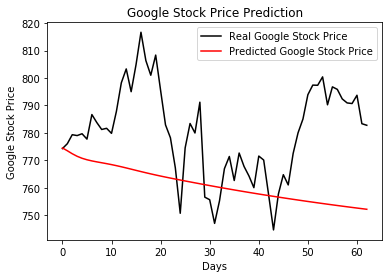

In [287]:
## Code for single feature modelling ('Open' stock price)

Forecast_Length = 63 # number of time periods for which future forecast is required

X_Vald_Predicted_Final = [] # list to save final set of predictions generated one by one

# Combining with last 60 values before vald timeframe:
vald_set_1 = train_vald_set[ (len(training_set) - TS_Range) : len(training_set) , :  ] # Timesteps_Range = 60 

# QC:
# np.savetxt("C:/Users/anurag.trivedi/2. Data/RNN Data/Recurrent_Neural_Networks/Updated/Temp.csv", vald_set_1, delimiter=",")

# Feature Scaling:
vald_set_scaled = sc.transform(vald_set_1)
# print(vald_set_scaled)

# Creating a data structure with 60 timesteps and no output:
# TS_Range = 60 # timesteps (should be optimized) extent of past data used for next prediction
X_Vald = []
for i in range(TS_Range, len(vald_set_scaled)+1):
    X_Vald.append( vald_set_scaled[i-TS_Range:i, 0] )
X_Vald = np.array(X_Vald)

# QC:
# np.savetxt("C:/Users/anurag.trivedi/2. Data/RNN Data/Recurrent_Neural_Networks/Updated/Temp1.csv", vald_set_scaled, delimiter=",")
# np.savetxt("C:/Users/anurag.trivedi/2. Data/RNN Data/Recurrent_Neural_Networks/Updated/Temp2.csv", X_Vald, delimiter=",") 

# 3D Reshaping:
X_Vald = np.reshape(X_Vald, (X_Vald.shape[0], X_Vald.shape[1], 1))

# Predictions:
X_Vald_Predicted = Regressor.predict(X_Vald)
# X_Vald_Predicted = sc.inverse_transform(X_Vald_Predicted)

X_Vald_Predicted_Final.append ( X_Vald_Predicted )

for i in range(0, Forecast_Length-1): # 'number of days of future forecasts'-1, in this case we need 64 days of forecasts in total
    vald_set_scaled = vald_set_scaled.tolist()
    vald_set_scaled.append( X_Vald_Predicted )
    vald_set_scaled = np.array(vald_set_scaled)
    vald_set_scaled = vald_set_scaled[1:TS_Range+1]
    
    X_Vald = []
    for i in range(TS_Range, len(vald_set_scaled)+1):
        X_Vald.append( vald_set_scaled[i-TS_Range:i, 0] )
        X_Vald = np.array(X_Vald)
        
    X_Vald = np.reshape(X_Vald, (X_Vald.shape[0], X_Vald.shape[1], 1))
    
    X_Vald_Predicted = Regressor.predict(X_Vald)
    
    X_Vald_Predicted_Final.append ( X_Vald_Predicted )
    
X_Vald_Predicted_Final = np.array(X_Vald_Predicted_Final) 
X_Vald_Predicted_Final = X_Vald_Predicted_Final[:,:,0] # converting 3D to 2D
X_Vald_Predicted_Final = sc.inverse_transform(X_Vald_Predicted_Final)
X_Vald_Predicted_Final

# Visualizing the results:
plt.plot(vald_set, color = 'black', label = 'Real Google Stock Price')
plt.plot(X_Vald_Predicted_Final, color = 'red', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()